#  High Energy Gamma Particles Classification comparison between Support Vector Machines and Naive Bayesian

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\user\Downloads\telescope_data.csv")
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df.tail()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [5]:
df.describe()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [6]:
df.shape

(19020, 12)

In [8]:
df.dtypes

Unnamed: 0      int64
fLength       float64
fWidth        float64
fSize         float64
fConc         float64
fConc1        float64
fAsym         float64
fM3Long       float64
fM3Trans      float64
fAlpha        float64
fDist         float64
class          object
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0    0
fLength       0
fWidth        0
fSize         0
fConc         0
fConc1        0
fAsym         0
fM3Long       0
fM3Trans      0
fAlpha        0
fDist         0
class         0
dtype: int64

Convert Categories into Numerical 

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
df["class"] = label_encoder.fit_transform(df["class"])

In [12]:
df.dtypes

Unnamed: 0      int64
fLength       float64
fWidth        float64
fSize         float64
fConc         float64
fConc1        float64
fAsym         float64
fM3Long       float64
fM3Trans      float64
fAlpha        float64
fDist         float64
class           int32
dtype: object

In [14]:
df.drop(["Unnamed: 0"],axis=1)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


Define X and Y

In [15]:
X = df.drop(["class"],axis=1)
Y = df["class"]

Train,Test,Split

In [17]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25,random_state=0)

In [18]:
x_train

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
9168,9168,25.9857,18.4585,2.5231,0.3538,0.1814,-25.4800,-6.2044,15.2170,56.1948,190.3300
8383,8383,37.5265,21.7254,3.0988,0.2087,0.1087,37.1436,8.3872,8.8451,7.3742,141.9140
3980,3980,58.8047,33.6055,3.5673,0.1798,0.0955,45.2378,56.4516,26.5973,4.6870,134.6540
8011,8011,81.8663,22.5846,3.0037,0.2062,0.1076,-98.9128,56.3823,15.6502,4.4916,242.7150
9018,9018,57.4159,17.4763,2.8344,0.2738,0.1428,22.4771,60.2797,12.2177,14.6429,202.6650
...,...,...,...,...,...,...,...,...,...,...,...
9225,9225,34.7527,16.3799,2.6212,0.2703,0.1376,21.9455,23.6607,7.2786,16.5306,158.1200
13123,13123,40.7440,16.0635,2.8145,0.3108,0.1668,15.8622,36.5069,-6.2138,13.3971,284.7751
9845,9845,35.8286,16.8952,2.8802,0.3070,0.1746,38.7674,17.2509,11.3048,0.4720,234.8680
10799,10799,20.0986,12.8671,2.4057,0.4558,0.2417,11.5039,9.7434,7.8750,21.6750,212.0980


In [19]:
x_test

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
18152,18152,17.1822,15.8933,2.4093,0.6648,0.3864,-16.4698,-3.1572,-3.9904,66.9122,61.0713
2571,2571,33.7228,18.2951,3.0639,0.2676,0.1394,32.5576,18.3456,-4.4196,11.0782,94.1792
12202,12202,61.3737,21.3660,3.2621,0.1816,0.1053,-2.9857,31.7738,-12.2608,0.9761,236.9240
4508,4508,20.0044,11.0652,2.2788,0.6737,0.4500,13.7202,19.7044,-9.9991,59.4730,197.5840
14903,14903,21.2509,10.8657,2.1847,0.5686,0.2843,14.7015,17.9440,7.8355,7.1820,123.8400
...,...,...,...,...,...,...,...,...,...,...,...
4088,4088,39.8586,10.4318,2.5218,0.4271,0.2752,45.8244,28.0080,7.9734,38.9220,81.2325
5044,5044,29.7456,16.8913,2.9120,0.3650,0.2284,20.9651,22.3978,-7.0530,19.1820,77.9320
7516,7516,42.8176,17.5801,2.6915,0.3683,0.2004,-41.9100,7.2154,-12.3568,4.9361,125.4900
7210,7210,18.8943,15.4488,2.3757,0.5600,0.3347,18.0703,19.4668,6.3870,2.7070,214.5640


# Build the Model

# SVM

In [21]:
from sklearn import svm
from sklearn.svm import SVC

In [22]:
model = svm.SVC().fit(x_train,y_train)
model.score(x_train,y_train)

0.9992989835261129

Building SVM (kernel='rbf') on train data

In [23]:
svm1 = SVC(kernel='rbf',gamma=1)
svm1.fit(x_train,y_train)

SVC(gamma=1)

Prediction

In [24]:
y_pred = svm1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[3079    0]
 [1676    0]]


Heat Map

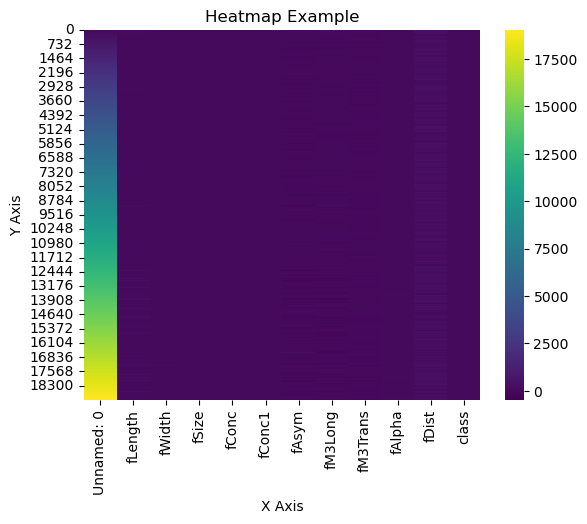

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create heatmap
sns.heatmap(df, cmap='viridis')

# Add labels
plt.title('Heatmap Example')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Show plot
plt.show()

Classification Report with rbf kernel

In [34]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      3079
           1       0.00      0.00      0.00      1676

    accuracy                           0.65      4755
   macro avg       0.32      0.50      0.39      4755
weighted avg       0.42      0.65      0.51      4755



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Classifier with polynomial kernel

In [35]:
svm2 = SVC(kernel='poly',degree=3)
svm2.fit(x_train,y_train)

SVC(kernel='poly')

Prediction

In [37]:
y_pred = svm2.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
Model Evaluation

In [38]:
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[3078    1]
 [   0 1676]]


Classification Report with polynomial kernel

In [39]:
report1 = classification_report(y_test,y_pred)
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3079
           1       1.00      1.00      1.00      1676

    accuracy                           1.00      4755
   macro avg       1.00      1.00      1.00      4755
weighted avg       1.00      1.00      1.00      4755



# Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred = Model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

Confusion Matrix

In [42]:
CM = confusion_matrix(y_test,y_pred)
print(CM)

[[3019   60]
 [ 458 1218]]


Classification Report

In [44]:
NBreport = classification_report(y_test,y_pred)
print(NBreport)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3079
           1       0.95      0.73      0.82      1676

    accuracy                           0.89      4755
   macro avg       0.91      0.85      0.87      4755
weighted avg       0.90      0.89      0.89      4755



# Comparison SVM vs Naive Bayes

In [47]:
Accuracy = model.score(x_train,y_train)

print("Accuracy:SVM : ",round(Accuracy*100,2))

Accuracy:SVM :  99.93


In [48]:
Accuracy = Model.score(x_train,y_train)

print("Accuracy:Naive Bayes : ",round(Accuracy*100,2))

Accuracy:Naive Bayes :  89.27
